In [39]:
import numpy as np

# Loading the dataset
dataset = np.load('qm7x_eq.npz', allow_pickle=True)

# What is inside?
for f in dataset.files:
    print(f)

EAT
S
xyz
Z


In [40]:
# Importing data
EAT = dataset['EAT'] # atomization energy
xyz = dataset['xyz'] # Cartesian coordinates
Z = dataset['Z'] # atomic indexes

n_molecules = len(xyz)
print('The number of molecules in the dataset is {:d}.'.format(n_molecules))

The number of molecules in the dataset is 41537.


In [41]:
from tqdm import tqdm
from scipy.spatial.distance import pdist

# Descriptor
def descriptor(R):
    
    nconfig = len(R)
    D = []
    for i in tqdm(range(nconfig)):
        D.append(1./pdist(R[i]))
    
    return D

d = descriptor(xyz)

# Making all descriptor entries of the same size
max_size = np.max([len(_) for _ in d])
nconfig = len(d)
D = np.zeros((nconfig, max_size))

for i in range(nconfig):
    size = len(d[i])
    D[i, :size] = d[i]

100%|█████████████████████████████████| 41537/41537 [00:00<00:00, 134476.55it/s]


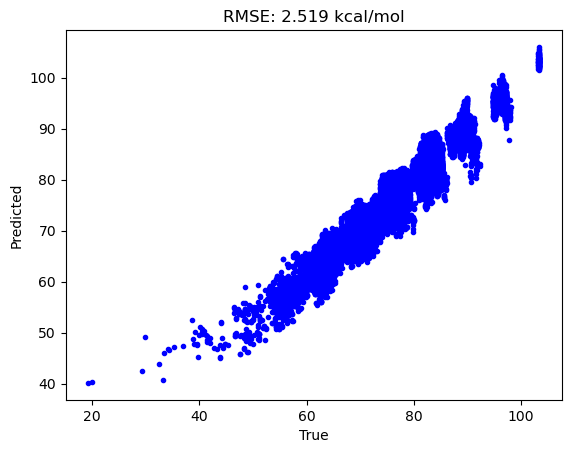

In [42]:
from sklearn import linear_model
import matplotlib.pyplot as plt

# ridge regression
reg = linear_model.Ridge(alpha=1e-8)
reg.fit(D, EAT)

rmse = np.sqrt(np.square(EAT - reg.predict(D)).mean())
plt.title('RMSE: {:.3f} kcal/mol'.format(rmse))
plt.scatter(EAT, reg.predict(D), marker='.', color='blue')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

100%|█████████████████████████████████| 41537/41537 [00:00<00:00, 155951.99it/s]


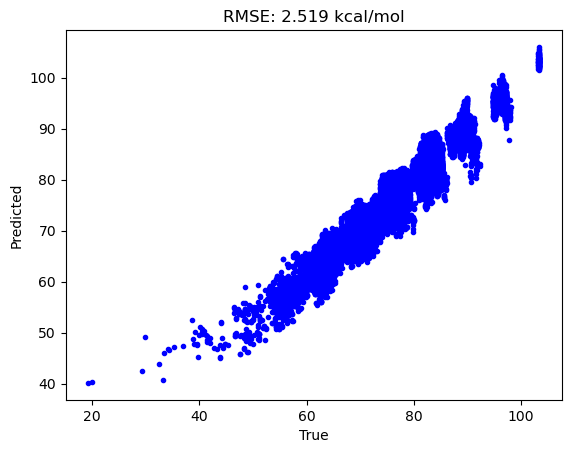

In [43]:
import numpy as np
from tqdm import tqdm
from scipy.spatial.distance import pdist
from sklearn import linear_model
import matplotlib.pyplot as plt

# Loading the dataset
dataset = np.load('qm7x_eq.npz', allow_pickle=True)

# Importing data
EAT = dataset['EAT'] # atomization energy
xyz = dataset['xyz'] # Cartesian coordinates
Z = dataset['Z'] # atomic indexes

# Descriptor
def descriptor(R):
    
    nconfig = len(R)
    D = []
    for i in tqdm(range(nconfig)):
        D.append(1./pdist(R[i]))
    
    return D

d = descriptor(xyz)

# Making all descriptor entries of the same size
max_size = np.max([len(_) for _ in d])
nconfig = len(d)
D = np.zeros((nconfig, max_size))

for i in range(nconfig):
    size = len(d[i])
    D[i, :size] = d[i]
    

# ridge regression
reg = linear_model.Ridge(alpha=1e-8)
reg.fit(D, EAT)

rmse = np.sqrt(np.square(EAT - reg.predict(D)).mean())
plt.title('RMSE: {:.3f} kcal/mol'.format(rmse))
plt.scatter(EAT, reg.predict(D), marker='.', color='blue')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

# 🧪 **Predicting Molecular Atomization Energies Using Ridge Regression**

### 📚 **Project Overview**

This project focuses on predicting the **atomization energies of molecules** using **Ridge Regression** with **L2 regularization**. The model is trained using features derived from inverse interatomic distances, extracted from molecular geometry data.

The goal is to minimize the **Root Mean Squared Error (RMSE)** while ensuring the model generalizes well to unseen molecular structures.


### ⚙️ **Tools and Libraries**

- Python 🐍
- NumPy (`numpy`)
- Scikit-learn (`sklearn`)
- Matplotlib (`matplotlib`)
- TQDM (Progress visualization)

---

### 📈 **Performance Metrics**

- **Root Mean Squared Error (RMSE):**  
  Measures the difference between true and predicted atomization energies. A lower RMSE indicates a more accurate model.

---

## 👨‍💻 **Author**

- **Name:** JIANG BINGYU and AGBOOLA MICHAEL DARAMOLA  
- **Date:** FEBRUARY, 2025  
- **Project:** Machine Learning for Molecular Property Prediction  
- **Institution:** UNIVERSITY OF LUXEMBOURG


### Using Feature Scaling with `StandardScaler`

Ridge Regression is sensitive to the scale of the input features because the regularization term depends on the size of coefficients. Standardizing features ensures each feature contributes equally to the model.

### 🔬 **Effect of Scaling on Ridge Regression**

#### ❌ **Without Scaling:**
- 🔺 Features with **larger magnitudes** → Larger coefficients → Heavier penalties.
- 🔻 Features with **smaller magnitudes** → Smaller coefficients → Less impact.

#### ✅ **With Scaling:**
- ⚖️ All features have the **same influence** initially.
- 📏 Regularization penalizes all coefficients **equally**.
- 🚀 Improves the **stability** and **convergence speed** of the model.

---

### ⚛️ **Why This Matters for Your Molecular Dataset**

In molecular feature data:
- 🔬 The **inverse interatomic distances** will have varied scales depending on atomic configurations.

#### ❌ **Without Scaling:**
- ⚡ Shorter distances might **dominate predictions**.
- ❗ Regularization will be **inconsistent** and biased toward larger-magnitude features.

#### ✅ **With Scaling:**
- ⚖️ Every **interatomic distance** contributes **equally** to the model.
- 🔍 **Ridge Regression** can apply **uniform regularization** across features.
- 📈 Leads to better **generalization** on unseen molecular data, improving predictive accuracy.


#### **How it works:**
- Each feature is rescaled to have a **mean of 0** and a **standard deviation of 1**.
- This prevents features with larger magnitudes from dominating the regression model.

#### **Mathematical Representation:**
$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ = Original feature value  
- $\mu$ = Mean of the feature  
- $\sigma$ = Standard deviation of the feature


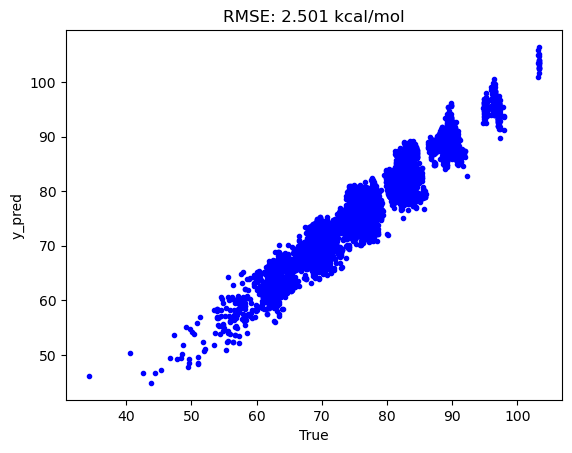

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(D, EAT, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(D, EAT, test_size=0.2)
# X_train, X_test, y_train, y_test = train_test_split(D, EAT, test_size=0.1, random_state=42)


# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1e-8)
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge.predict(X_test_scaled)

# RMSE Calculation
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred))
plt.title('RMSE: {:.3f} kcal/mol'.format(rmse_scaled))
plt.scatter(y_test, y_pred, marker='.', color='blue')
plt.xlabel('True')
plt.ylabel('y_pred')
plt.show()

#### **Effect:**

- **Before scaling**: RMSE ≈ **2.519 kcal/mol**  
- **After scaling**: RMSE reduced to ≈ **2.501 kcal/mol**